# Data Analyst Associate Practical Exam Submission

## Company Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

## Customer Questions
1. For every column in the data:
- a. State whether the values match the description.

- b. State the number of missing values in the column.

- c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many products are repeat purchases. Use the visualization to:
- a. State which category of the variable repeat purchases has the most observations.

- b. Explain whether the observations are balanced across categories of the variable repeat purchases.

3. Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

4. Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

## Task 1. Let's get started!

## Importing Modules

In [54]:
# import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Assessing Table

In [55]:
# Loading data
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
# Table preview and shape
print(pet_supplies.shape)
pet_supplies.head()

(1500, 8)


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


- 1500 rows and 8 columns exist in `pet_supplies` dataframe. 
- A `pet_supplies` dataframe contains 8 columns: product_id, category, animal, size, price, sales, rating and repeat_purchase.

In [56]:
# Checking table information
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [57]:
# Checking for duplicates
pet_supplies.duplicated().sum()

0

In [58]:
# Checking for empty values
pet_supplies.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

There are no duplicates in this dataframe. However, there are 150 missing values in rating variable. 

In [59]:
# Checking unique values of variables
print(len(pet_supplies['product_id'].unique()))
print(pet_supplies['category'].unique())
print(pet_supplies['animal'].unique())
print(pet_supplies['size'].unique())
print(pet_supplies['price'].unique()[:5])
print(pet_supplies['sales'].unique()[:5])
print(pet_supplies['rating'].unique())
print(pet_supplies['repeat_purchase'].unique())

1500
['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
['Bird' 'Dog' 'Cat' 'Fish']
['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
['51.1' '35.98' '31.23' '24.95' '26.18']
[1860.62  963.6   898.3   982.15  832.63]
[ 7.  6.  5.  4.  8.  1.  3. nan  2.  9.]
[1 0]


In [60]:
# Checking price nad sales numerical data
print(pet_supplies['price'].describe())
print("-------------------")
print(pet_supplies['sales'].describe())

count         1500
unique         707
top       unlisted
freq           150
Name: price, dtype: object
-------------------
count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64


In [61]:
# Checking if sales values are rounded by 2
def is_rounded(value):
    return round(value, 2) == value

rounded_values = pet_supplies['sales'].apply(is_rounded)
print(rounded_values.unique())

[ True]


## Data with No Issues
- `product_id` column was in the great shape. No missing values. 
- `animal` column is in the good shape. No single missing value. 
- `sales` column is in the great shape. 
- `repeat_purchase` column is in the great shape.

## Data Issues

- `category` column needs to be fixed. there are uncategorized values, these values need to be replaced with "Unknown".
- `size` column needs to be fixed. words are uncapitalized and capitalized. These values need to be consistent.
- `price` column needs to be fixed. there are values called "unlisted". All missing values need to be median price. 
- `rating` column needs to be fixed. there are missing values which have to be replaced with 0.



Issue #1 `category`: uncategorized values will be replaced with "Unknown".

In [62]:
# Change all '-' value in category column with "Unknown"
pet_supplies.category =  pet_supplies.category.replace('-', 'Unknown')

### Test

In [63]:
print(pet_supplies.category.unique())

['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']


Issue #2 `size`: all values needs to be lowercased.

In [64]:
# Make all values in size column lowercase letters. 
pet_supplies["size"] = pet_supplies['size'].str.lower()

### Test

In [65]:
pet_supplies["size"].unique()

array(['large', 'medium', 'small'], dtype=object)

Issue #3 `price`: all unlisted values needs to be median price.

In [66]:
# Replace "unlisted" with NaN and convert price to numeric dtype
pet_supplies['price'] = pd.to_numeric(pet_supplies['price'].replace('unlisted', np.nan))

# Calculate median price and replace NaN values with median
median_price = pet_supplies['price'].median()
pet_supplies['price'] = pet_supplies['price'].fillna(median_price)

### Test

In [67]:
# Checking if NaN values were replaced with median
display(pet_supplies['price'].describe())
print("-------------------")
pet_supplies['price'].head()

count    1500.000000
mean       29.288373
std         7.335749
min        12.850000
25%        25.000000
50%        28.065000
75%        33.142500
max        54.160000
Name: price, dtype: float64

-------------------


0    51.10
1    35.98
2    31.23
3    24.95
4    26.18
Name: price, dtype: float64

Issue #4 `rating`: nan needs to be replaced with 0.

In [68]:
# Replace "nan" with 0
pet_supplies['rating'] = pet_supplies['rating'].replace(np.nan, 0)

### Test

In [69]:
# Checking if nan was replaced with 0
pet_supplies['rating'].unique()

array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.])

In [70]:
# Preview updated and cleaned data
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


## Data Validation
Describe what you did to make values match the description if they did not match.

### Description
There are 1500 rows with 8 columns in the data. While assessing the data no duplicates was found. The below changes was made for each columns:

1. There are 1500 unique `product_id` as expected.
2. `category` was changed. '-' values were replaced with "Unknown".
3. `animal` column contained 4 unique values as expected. 
4. `size` column was changed. Made all values lowercase letters. 
5. `price` column was changed. missing values are replaced with overall median price.
6. `sales` column contained only postive value rounded to 2 decimal places as expected.  
7. `rating` column is changed. Mising values were replaced with 0.
8. `repeat_purchase` column contained only 1, and 0 as expected.

## Task 2. Create a Visualization

Create a visualization that shows how many products are repeat purchases. Use the visualization to: 
1. State which category of the variable repeat purchases has the most observations.
2. Explain whether the observations are balanced across categories of the variable repeat purchases.

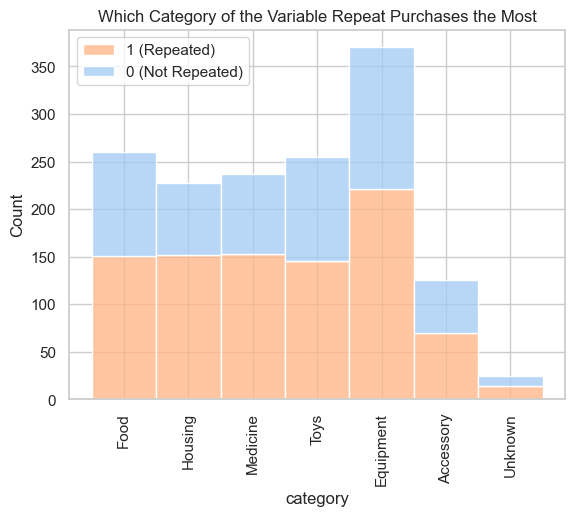

In [71]:
# set a background
sns.set_theme(style="whitegrid", palette="pastel")

sns.histplot(data= pet_supplies, x="category", hue="repeat_purchase", multiple="stack")
plt.xticks(rotation=90)
plt.title("Which Category of the Variable Repeat Purchases the Most")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)',])
plt.show()

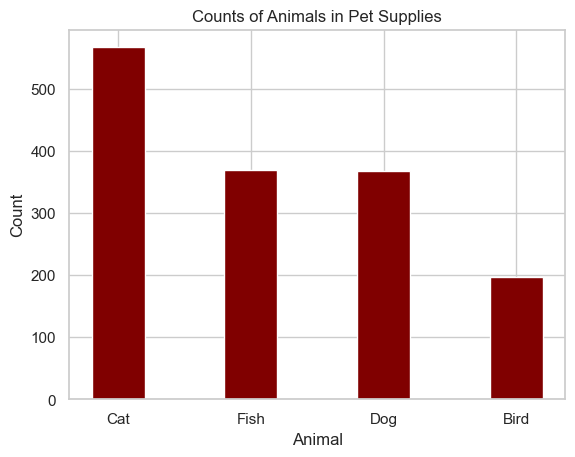

In [72]:
# Get the counts of each unique value in the 'animal' variable
animal_counts = pet_supplies['animal'].value_counts()

# Create the bar plot
plt.bar(animal_counts.index, animal_counts.values, color='maroon', width=0.4)

# Add labels and title
plt.xlabel('Animal')
plt.ylabel('Count')
plt.title('Counts of Animals in Pet Supplies')

# Show the plot
plt.show()

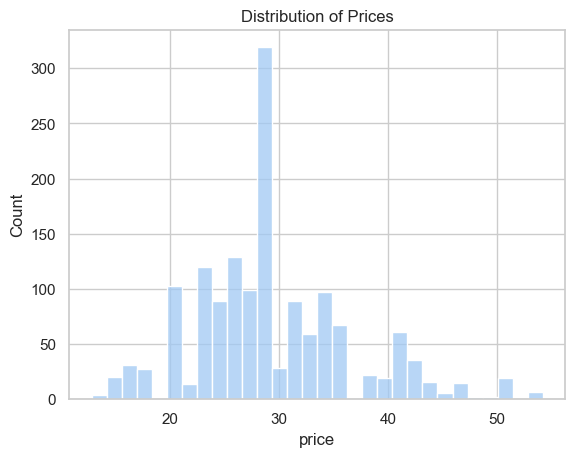

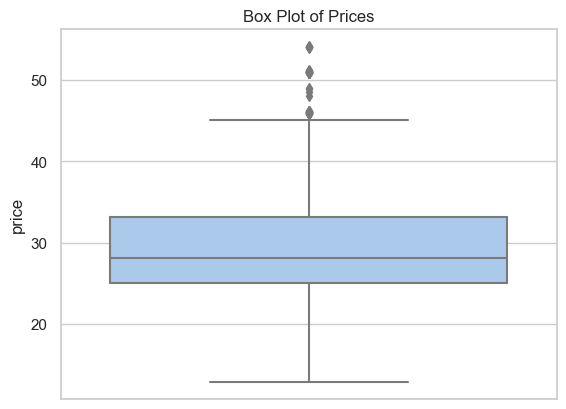

In [73]:
# Create a histogram of the 'price' variable
sns.histplot(data=pet_supplies, x='price')
plt.title('Distribution of Prices')

# Show the histogram
plt.show()

# Create a box plot of the 'price' variable
sns.boxplot(data=pet_supplies, y='price')
plt.title('Box Plot of Prices')

# Show the box plot
plt.show()

### Description 
The observation is balanced across categories of the variable repeat purchases. detailed explanation is down below:
1.  From the first graph above, We can tell that customers repeat purchases the `Equipment` items the most. 
2.  From the first graph above, We can tell that `Food`, `Housing`, `Medicine` returns relatively similar results in terms of the relashionship with repeat purchases. 
3.  From the second graph above, we can tell that the most sold item were the `Cat` items and the least sold item were the `Bird`items.
4.  From the third graph above, We can tell that average price in this store is around 30 dollars.

## Task 3. Describe the distribution of all of the sales.
Your answer must include a visualization that shows the distribution.  

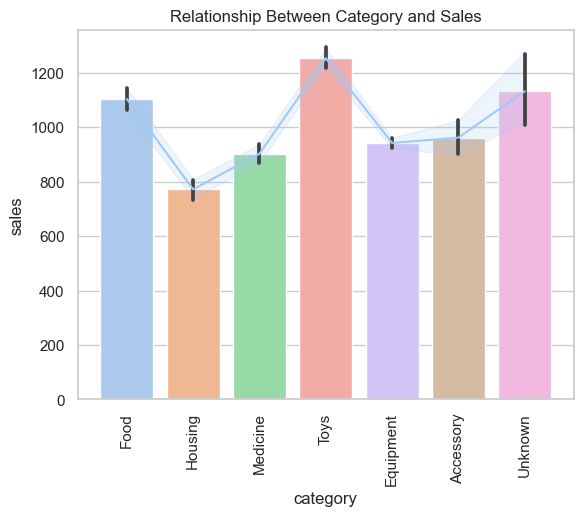

In [74]:
# Create bar plot of category and sales  
sns.barplot(data=pet_supplies, x="category", y="sales")
plt.title("Relationship Between Category and Sales")
plt.xticks(rotation=90)

# Add line plot
sns.lineplot(data=pet_supplies, x="category", y="sales", sort=False)

# Show the plot
plt.show()

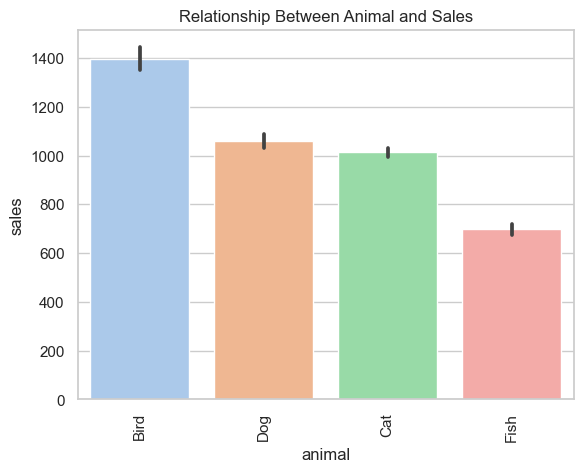

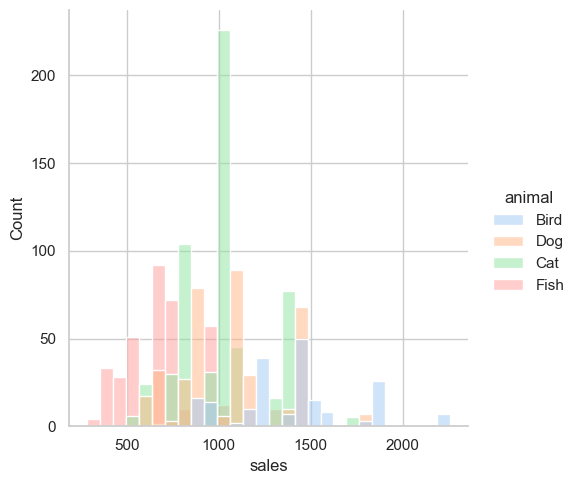

In [75]:
# Create bar plot
sns.barplot(data=pet_supplies, x="animal", y="sales")
plt.title("Relationship Between Animal and Sales")
plt.xticks(rotation=90)

# Add histogram
sns.displot(data=pet_supplies, x="sales", hue="animal", kde=False)

# Show the plot
plt.show()

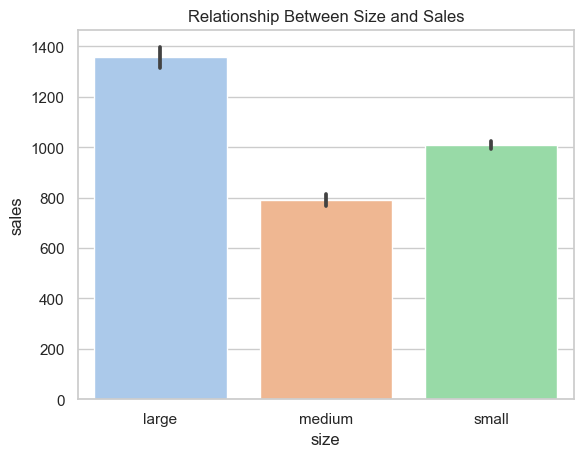

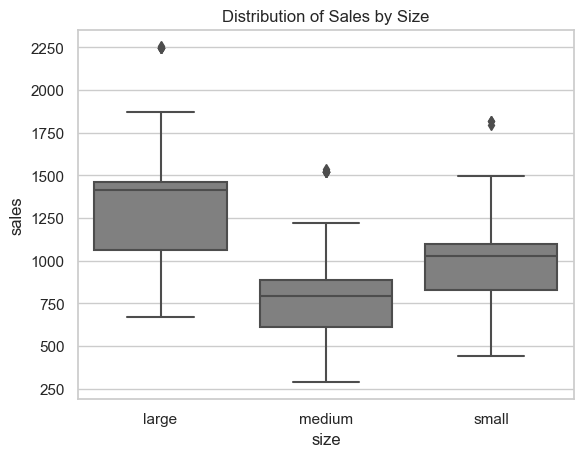

In [76]:
# Create bar plot
sns.barplot(data=pet_supplies, x="size", y="sales")
plt.title("Relationship Between Size and Sales")
plt.show()

# Create boxplot
sns.boxplot(data=pet_supplies, x="size", y="sales", color="gray", saturation=0.5)
plt.title("Distribution of Sales by Size")
plt.show()

## Description
The distribution of all of the all sales are vizualized. Detailed explanation is down below:
1. From the first graph, we can tell that `Food` and `Toys` are the top selling categories. 
2. From the second graph, we can tell that `Bird` products sold the most last year. `Bird` products sold double compared to `Fish` products.
3. From the third graph, we can tell that `large` products sold well last year. `Medium` products sold least. 

## Suggestion
Based on 3 graphs above, I would recommend a PetMind owner to display items for `birds` especially, for `large` birds. The display products would be even better if those are `toys` or `food`. 

## Extra visualization! 
Show the relationship between rating and Repeat_purchase!

repeat_purchase
0    4.575758
1    4.437086
Name: rating, dtype: float64

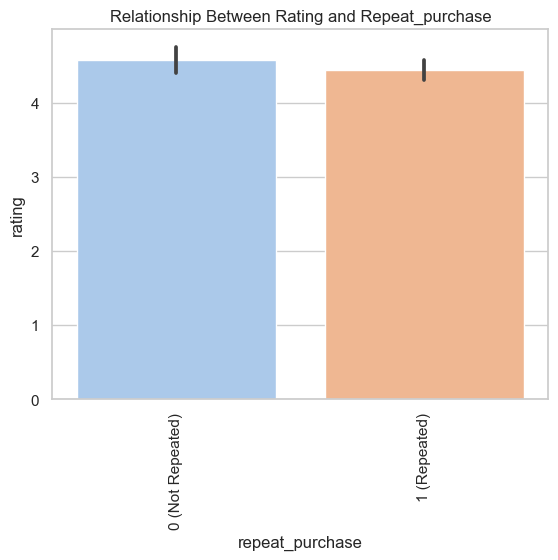

In [77]:
# Checking the rating of repeat purchase and not repeated purchase
display(pet_supplies["rating"].groupby(pet_supplies["repeat_purchase"]).mean())

# Create bar plot of repeat_purchase and rating 
sns.barplot(data=pet_supplies, x="repeat_purchase", y="rating")

#labels for x-asix
labels = ['1 (Repeated)','0 (Not Repeated)',]

plt.title("Relationship Between Rating and Repeat_purchase")
plt.xticks(ticks=[1, 0], labels=labels, rotation=90)
plt.show()

### Description
The vizualization of relationship between `rating` and `repeat_purchase`. Detailed explanation is down below:

1. `Non-repeated` items have higher rating than repeated items. I was suprised becauase I thought `repeated` items would have higher rating overall. 

## Task 4. Describe the relationship between repeat purchases and sales. 
Your answer must include a visualization to demonstarte the relatioship.

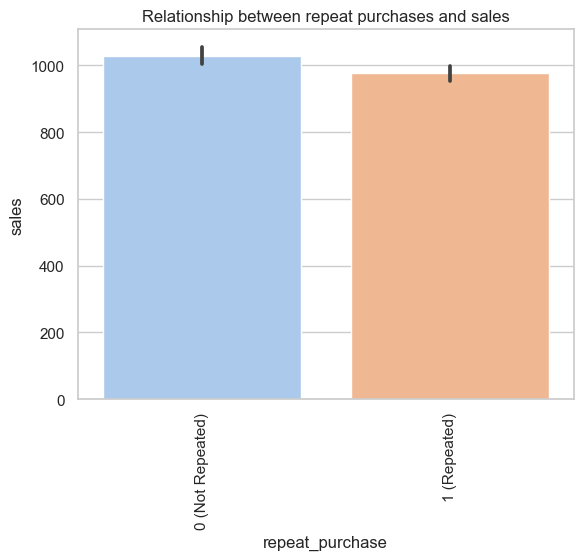

In [78]:
# Create bar plot of repeat_purchase and sales 
sns.barplot(data=pet_supplies, x="repeat_purchase", y="sales")

# labels for x-asix
labels = ['1 (Repeated)','0 (Not Repeated)',]

plt.title("Relationship between repeat purchases and sales")
plt.xticks(ticks=[1, 0], labels=labels, rotation=90)
plt.show()



### An additional plot to make a better understanding of this relationship.

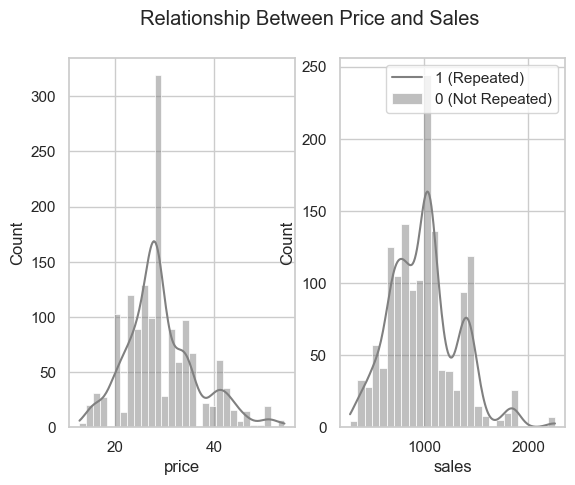

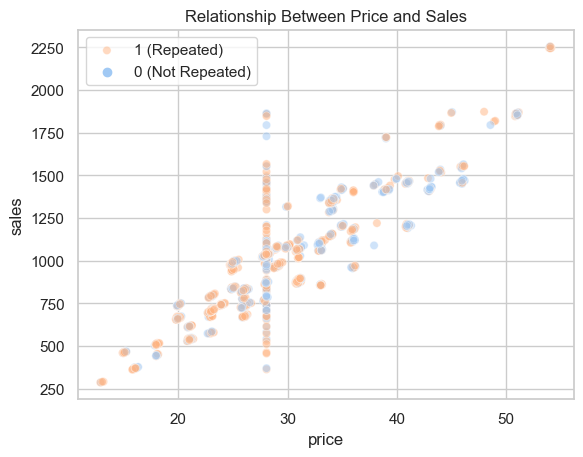

In [79]:
# Create scatter plot
sns.scatterplot(data=pet_supplies, x="price", y="sales", hue="repeat_purchase", alpha=0.5)

# Add histogram for price variable
plt.subplot(1, 2, 1)
sns.histplot(data=pet_supplies, x="price", color="gray", kde=True)

# Add histogram for sales variable
plt.subplot(1, 2, 2)
sns.histplot(data=pet_supplies, x="sales", color="gray", kde=True)

# Set plot title and legend
plt.suptitle("Relationship Between Price and Sales")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)'])

# Show the plot
plt.show()

# Create scatter plot of price and sales 
sns.scatterplot(data=pet_supplies, x="price", y="sales", hue="repeat_purchase", alpha=0.5)

plt.title("Relationship Between Price and Sales")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)',])
plt.show()

### Description
The relationship between repeat purchases and sales are explained by two visualizations. Detailed explanations are down below:

1. From the first visualization, we can tell that `repeat purchases` items and `not repeated` items make almost the same amount of sales last year in total.
2. From the second visualization, The relationship of `sales` and `price` of Repeat purchases values and not repeated values are almost identical on the graph. The visualization demonstrate the strong postive relationship. The middle vertical dots on the graph represents the unlisted values which were replaced with the median price.
3. From the second visualization, we can tell that higher price will generate higher sales in total regardless of `repeat purchases` items nor `not repeated` items.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam